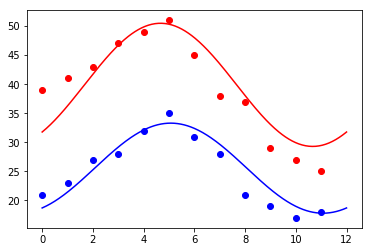

In [1]:
# Function to fit the maximum and minimum temperatures in a city in India for every month into a periodic function.

# Import the required modules. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize 

# Function to fit the values to a periodic function
def yearly_temps(time,avg,ampl,time_offset):
    return (avg+ampl*np.cos((time+time_offset)*2*np.pi/time.max()))

# Define max and min arrays and the months. 
maxarray = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
minarray = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months=np.arange(12)

# Call the function to fit to the curve. 
res_max,cov_max=optimize.curve_fit(yearly_temps,months,maxarray,[55,25,0])
res_min,cov_min=optimize.curve_fit(yearly_temps,months,minarray,[15,35,0])
days=np.linspace(0,12,num=365)

# Plot the figure for curve fitting
plt.figure()
plt.plot(months,maxarray,'ro')
plt.plot(days,yearly_temps(days,*res_max),'r-')

plt.plot(months,minarray,'bo')
plt.plot(days,yearly_temps(days,*res_min),'b-')
plt.show()

In [2]:
# Read the titanic dataset
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


['female' 'male']
[466 843]


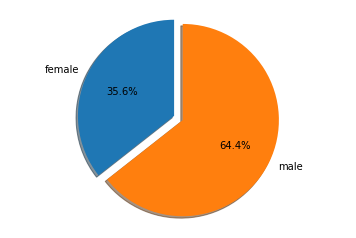

In [3]:
# Create a pie chart for the male/female population. 

size=titanic.groupby(['sex']).size().values
labels=titanic.groupby(['sex']).size().index.values
print(labels)
print(size)
fig1, ax1 = plt.subplots()
ax1.pie(size,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,explode=(0,0.1))
ax1.axis('equal') 
plt.show()

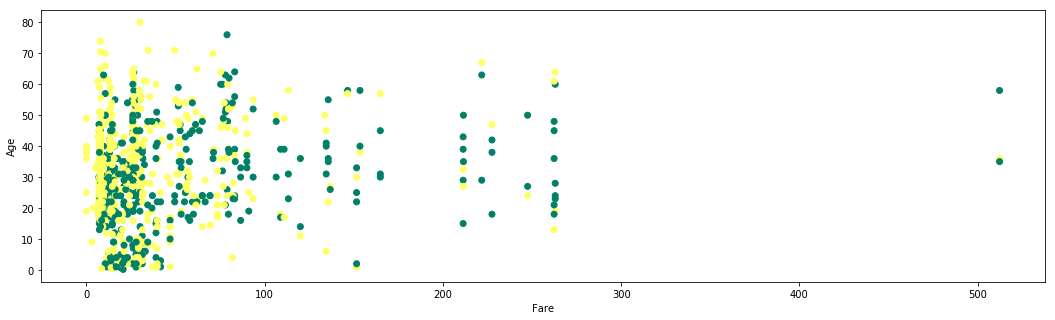

In [4]:
# Create a scatter plot with the Fare paid and the Age. The plot will have different colors for different gender. 
# Define color parameter to have different values for male and female gender. 

plt.figure(figsize=(18,5))
color=titanic.replace({'sex':{'female':1,'male':2}})
color1=color['sex'].fillna(0)
plt.scatter(titanic['fare'],titanic['age'],cmap='summer',c=color1)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()